In [1]:
%matplotlib inline
import geopandas

from shapely.geometry import Polygon
from shapely.affinity import rotate

import sys
sys.path.insert(0, "../")
from weavingspace import TileUnit
from weavingspace import Tiling

In [2]:
ak = geopandas.read_file("data/imd-auckland-2018.gpkg")

# Arrows
This is based on two sets of arrows pointing in opposite directions.

We can construct it based on differencing a basic square tiles with an arrow shape, exploding the difference into polygons and assembling into a `TileUnit.elements` geodataframe.

<Axes: >

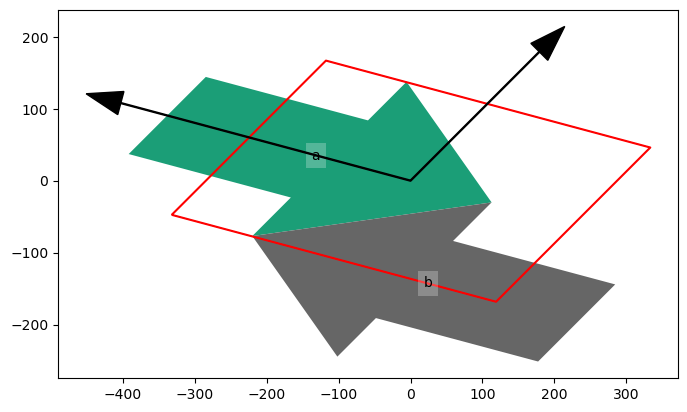

In [3]:
d = 350
arrow_tile = TileUnit(spacing = d, crs = ak.crs)
arrow1 = Polygon([(-3*d/4, -d/4), (-d/4,-d/4), (-d/4,-d/2), 
                 (d/4,0), (-d/4,d/2), (-d/4,d/4), (-3*d/4,d/4)])
arrow2 = rotate(arrow1, 180, origin = (0, -d/4))
arrow_tile.tiles = geopandas.GeoDataFrame(
    data = {"tile_id" : list("ab")}, crs = 2193,
    geometry = geopandas.GeoSeries([arrow1, arrow2]))

arrow_tile = arrow_tile.transform_scale(4/3, 3/4)
arrow_tile = arrow_tile.transform_skew(30)
arrow_tile = arrow_tile.transform_rotate(-15)

arrow_tile.plot(show_vectors = True)

In [4]:
tiling = Tiling(arrow_tile, ak)
arrows_tiling = tiling.get_tiled_map()

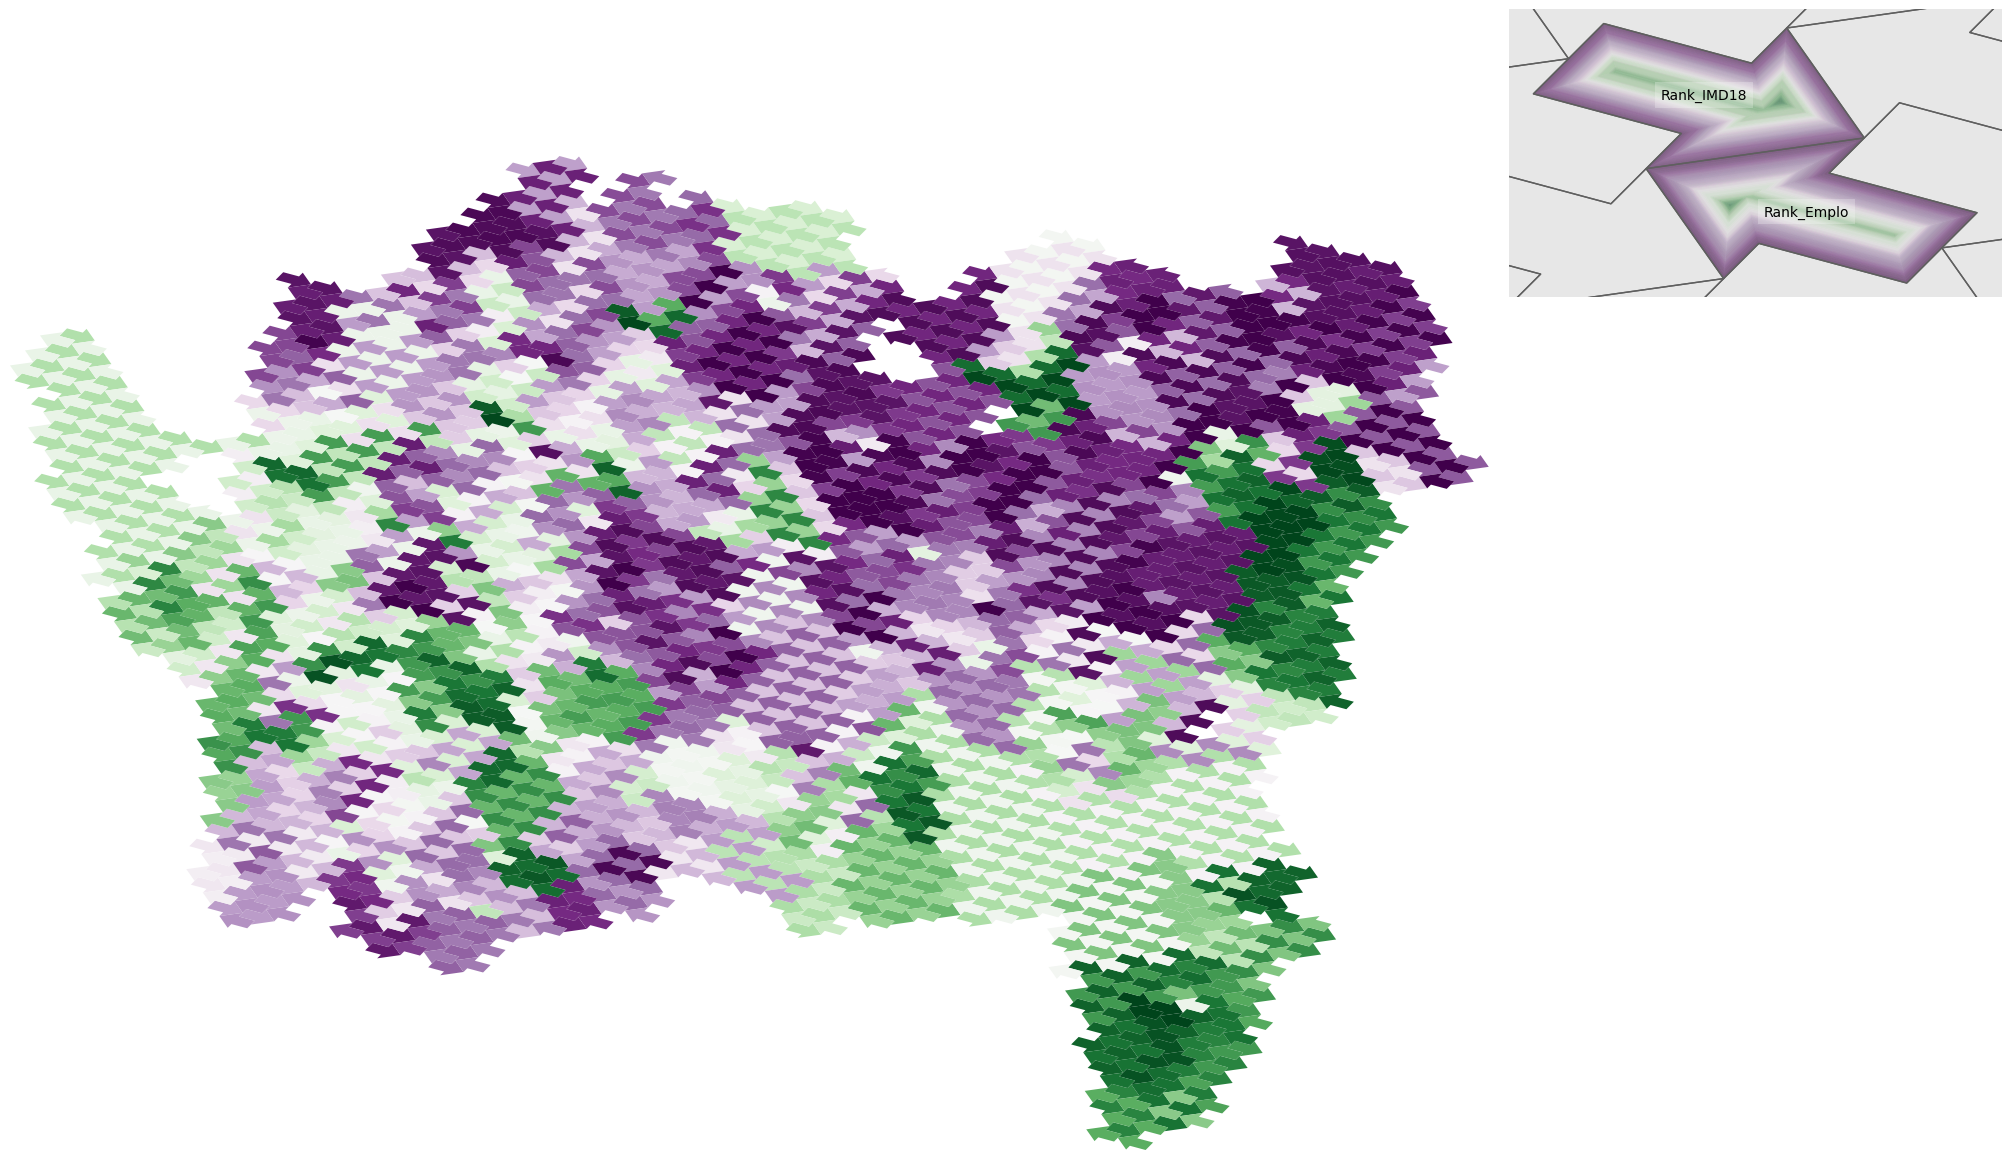

In [6]:
arrows_tiling.vars_to_map = [x for x in ak if "Rank" in x]
arrows_tiling.colors_to_use = ("PRGn", "PRGn")
arrows_tiling.n_classes = 100
fig = arrows_tiling.render(use_ellipse = False, legend_zoom = 0.9)

Symbolising two correlated variables on the same colour ramp shows up areas of poor correlation well.